<a href="https://colab.research.google.com/github/StevenGarc/Ejercicios_IA/blob/master/ia_parcial2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# hill climbing:

In [ ]:
from copy import copy, deepcopy 
from random import randrange

In [ ]:
class sudoku:

  def __init__(self, tablero, solucion=None):
    self.tablero=tablero
    self.solucion=solucion
  
  def __str__(self):
    cpSolucion = copy(self.solucion)
    stri=""
    stri+=' '
    for j in range(6):
      stri+="---"
    stri+='-  \n'
    for i in range(6):
      stri+='|'
      for j in range(6):
        stri+=" "+str(self.tablero[i][j] if self.tablero[i][j]!=0 else cpSolucion.pop(0))+' '
        if j%3==2 : stri+='|'
      stri+='\n'
      
      if i%2==1:
        stri+=' '
        for j in range(6):
          stri+="---"
        stri+='-  \n'
        


    return stri

In [ ]:
class estado:
  
  def __init__ (self, solucion):
    self.solucion = solucion
  
  def __str__ (self):
    return str(self.solucion)
    

In [ ]:
def generar_estados(e):
  estados = []
  for i in range(len(e.solucion)):
    new = copy(e.solucion)
    new[i]= (new[i]+1)%6 if (new[i]+1)%6!=0 else 6
    estados.append(estado(new))
    
    new = copy(e.solucion)
    new[i]= (new[i]-1)%6 if (new[i]-1)%6!=0 else 6
    estados.append(estado(new))
  return estados


In [ ]:
def generar_estado_aleatorio(e):
  new = []
  for i in e.solucion:
    new.append(randrange(1,7))
  return estado(new)

In [ ]:
def generar_estado(e):
  t = copy(e.solucion)
  rand = randrange(len(t))
  mover = [-1,1][randrange(2)]
  t[rand] = 6 if (t[rand]+mover)%6 == 0 else (t[rand]+mover)%6 
  return estado(t)


In [ ]:
def utilidad(sudoku, e):
  evaluar = deepcopy(sudoku.tablero)
  solucion= copy(e.solucion)

  repeticion_col= [[-1,-1,-1,-1,-1,-1],[-1,-1,-1,-1,-1,-1],[-1,-1,-1,-1,-1,-1],[-1,-1,-1,-1,-1,-1],[-1,-1,-1,-1,-1,-1],[-1,-1,-1,-1,-1,-1]]
  repeticion_fila= [[-1,-1,-1,-1,-1,-1],[-1,-1,-1,-1,-1,-1],[-1,-1,-1,-1,-1,-1],[-1,-1,-1,-1,-1,-1],[-1,-1,-1,-1,-1,-1],[-1,-1,-1,-1,-1,-1]]
  repeticion_cuadrante= [[-1,-1,-1,-1,-1,-1],[-1,-1,-1,-1,-1,-1],[-1,-1,-1,-1,-1,-1],[-1,-1,-1,-1,-1,-1],[-1,-1,-1,-1,-1,-1],[-1,-1,-1,-1,-1,-1]]

  
  for i in range(len(evaluar)):
    for j in range(len(evaluar)):
      if evaluar[i][j]==0: evaluar[i][j]=solucion.pop(0)

  for i in range(len(evaluar)):
    for j in range(len(evaluar)):
      repeticion_fila[i][evaluar[i][j]-1]+=1
      repeticion_col[i][evaluar[j][i]-1]+=1
      repeticion_cuadrante[int(j/3)+int(i/2)*2][evaluar[i][j]-1]+=1


  total=0
  for i in range(len(evaluar)):
    for j in range(len(evaluar)):
      #total+=abs(repeticion_total[i][j])
      total+=abs(repeticion_col[i][j])
      total+=abs(repeticion_fila[i][j])
      total+=abs(repeticion_cuadrante[i][j])
      

  return total


In [ ]:
def hill_climbing(sudoku, inicial, iteraciones):
  Utilidad_ini = utilidad(sudoku, inicial)
  Utilidad = Utilidad_ini
  ite = 0
  for i in range(iteraciones):
    ite+=1
    for e in generar_estados(inicial):
      #print(e)
      v =  utilidad(sudoku, e)
      if v <= Utilidad:
        inicial = e
        Utilidad = v
        if Utilidad == 0: return ite, Utilidad, inicial

  return ite, Utilidad, inicial

In [ ]:
def Stochastic_hill_climbing(sudoku, inicial, iteraciones):
  Utilidad_ini = utilidad(sudoku, inicial)
  Utilidad = Utilidad_ini
  ite = 0
  for i in range(iteraciones):
    ite+=1
    pocibles = []
    for e in generar_estados(inicial):
      v =  utilidad(sudoku,e)
      if v <= Utilidad:
        pocibles.append(e)
    if len(pocibles) != 0:
      rand = randrange(len(pocibles))
      inicial = pocibles[rand]
      Utilidad = utilidad(sudoku, inicial)
      if Utilidad == 0: return ite, Utilidad, inicial
  return ite, Utilidad, inicial

In [ ]:
def First_choice_hill_climbing(sudoku, inicial, iteraciones):
  ite = 0
  for i in range(iteraciones):
    ite+=1
    nuevo = generar_estado(inicial)
    if utilidad(sudoku,nuevo) <= utilidad(sudoku,inicial):
      inicial = nuevo 
      Utilidad = utilidad(sudoku, inicial)
      if Utilidad == 0: return ite, Utilidad, inicial
  return ite, utilidad(sudoku, inicial), inicial

In [ ]:
def Random_restart_hill(sudoku, inicial, iteraciones):
  ite = 0
  for i in range(iteraciones):
    ite += 1
    nuevo = generar_estado_aleatorio(inicial)
    k, v, nuevo = hill_climbing(sudoku, nuevo, 20)
    if v <= utilidad(sudoku,inicial):
      inicial = nuevo
      Utilidad = utilidad(sudoku,inicial)
      if Utilidad == 0: return ite, Utilidad, inicial
  return ite, utilidad(sudoku, inicial), inicial

In [ ]:
tablero = [
           [0,0,3,0,1,0],
           [5,6,0,3,2,0],
           [0,5,4,2,0,3],
           [2,0,6,4,5,0],
           [0,1,2,0,4,5],
           [0,4,0,1,0,0]
]
solucion=[1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]
s=sudoku(tablero, solucion)
print(s)
e = estado(solucion)

print('valor',utilidad(s, e))

ite, v, e = hill_climbing(s, e, 10000)
s.solucion=e.solucion
print(e.solucion)
print(s)
print('valor',v)
print('ite',ite)

ite, v, e = Stochastic_hill_climbing(s, e, 10000)
s.solucion=e.solucion
print(e.solucion)
print(s)
print('valor',v)
print('ite',ite)

ite, v, e = First_choice_hill_climbing(s, e, 10000)
s.solucion=e.solucion
print(e.solucion)
print(s)
print('valor',v)
print('ite',ite)

ite, v, e = Random_restart_hill(s, e, 10000)
s.solucion=e.solucion
print(e.solucion)
print(s)
print('valor',v)
print('ite',ite)


# Algoritmo Genetico

In [ ]:
LONGITUD_CROMOSOMA = 16
tablero = [
           [0,0,3,0,1,0],
           [5,6,0,3,2,0],
           [0,5,4,2,0,3],
           [2,0,6,4,5,0],
           [0,1,2,0,4,5],
           [0,4,0,1,0,0]
]
SUDOKU=sudoku(tablero)

class Individuo:
  def __init__(self, cromosoma):
        self.cromosoma = cromosoma

  def get_fenotipo(self):
        x = estado(self.cromosoma)
        return x
        
    ## fitness    
  def fevaluar(self):
      y = utilidad(SUDOKU, self.get_fenotipo())
      return y
    
  def __gt__ (self, otro):
    return self.fevaluar() > otro.fevaluar()
  
  def __eq__(self, otro):
    return self.cromosoma == otro.cromosoma
    
  def __str__(self):
    return (self.cromosoma.__str__() + " x={} puntaje: {}".format(self.get_fenotipo() , self.fevaluar()))
    
  def __repr__(self):
    return self.__str__()


In [ ]:
def cruzar(padre1, padre2):

    longitud_cromosoma = len(padre1.cromosoma)

    c=[]
    for i in range(longitud_cromosoma):
      c.append(padre1.cromosoma[i] if i<longitud_cromosoma/2 else padre2.cromosoma[i])
    hijo = Individuo(cromosoma=c)
    return hijo


In [ ]:
import random
def mutar(individuo, prob=0.1):

  for index, gen in enumerate(individuo.cromosoma):
    if random.random() < prob:
      individuo.cromosoma[index] = randrange(1,7)
  return individuo


In [ ]:
def generar_random_cromosoma(longitud=16):
    cromosoma = []
    for i in range(longitud):
        gen = randrange(1,7)
        cromosoma.append(gen)
    return cromosoma

In [ ]:
def generar_poblacion_inicial(tamano_poblacion=10, longitud_cromosoma=16):
    poblacion = []
    for i in range(tamano_poblacion):
        repetir = True
        while repetir:
            individuo = Individuo(generar_random_cromosoma(longitud=longitud_cromosoma))
            poblacion.append(individuo)
            repetir = False

    return poblacion


In [ ]:
poblacion = generar_poblacion_inicial(10, LONGITUD_CROMOSOMA)

def seleccionar_padre_por_toreno(poblacion):
  
    padre1 = random.choice(poblacion)
    padre2 = random.choice(poblacion)
    padre = min(padre1, padre2)
    return padre


In [ ]:
def seleccionar_padre_por_ruleta(poblacion):
    ruleta = []
    for i in poblacion:
        valor = i.fevaluar()
        if valor == 0:
            prob = 100
        if valor != 0:
            prob = int(100 / valor)
        for n in range(prob + 1):
            ruleta.append(i)
    return random.choice(ruleta)

In [ ]:

def generar_padres(poblacion, num_padres=6, seleccion=0):

    metodo= [seleccionar_padre_por_toreno, seleccionar_padre_por_ruleta]
    posibles_padres = deepcopy(poblacion)
    padres_seleccionados = []
    posibles_padres.sort(reverse=False)
    for i in range(num_padres):
        padre = metodo[seleccion](posibles_padres)
        padres_seleccionados.append(padre)
        posibles_padres.remove(padre)
        
    return padres_seleccionados

In [ ]:
## ALGORITMO GENÉTICO
def algoritmo_genetico(Generaciones=100, poblacion=10, longitud_clomosoma=LONGITUD_CROMOSOMA, seleccion_padres=0, probabilidad_mutacion=0.1):
  historico_mejor=[]
  poblacion = generar_poblacion_inicial(poblacion, longitud_clomosoma)
  anterior_mejor = None

  for i in range(Generaciones):
      poblacion.sort(reverse=False)
      anterior_mejor = poblacion[0]
      nueva_poblacion = []
      for i in range(int(len(poblacion)/2)):
        padres = generar_padres(poblacion, 2, seleccion_padres)
        hijo1 = cruzar(padres[0],padres[1])
        hijo2 = cruzar(padres[1],padres[0])
        ## mutar hijos
        hijo1 = mutar(hijo1, probabilidad_mutacion)
        hijo2 = mutar(hijo2, probabilidad_mutacion)
        ## agrega hijos a la nueva población
        nueva_poblacion.append(hijo1)
        nueva_poblacion.append(hijo2)
        ## ...
    
      poblacion = nueva_poblacion
    # Eltismo: Incluye al mejor de la generación anterior en la nueva generación
      poblacion.sort(reverse=False)
      poblacion[-1] = anterior_mejor
      historico_mejor.append(anterior_mejor.fevaluar())
      #print(anterior_mejor)
  return historico_mejor, anterior_mejor

In [ ]:
print(algoritmo_genetico(Generaciones=100, poblacion=10, longitud_clomosoma=LONGITUD_CROMOSOMA, seleccion_padres=0, probabilidad_mutacion=0.1))
print(algoritmo_genetico(seleccion_padres=0))


([52, 46, 46, 46, 42, 42, 38, 32, 32, 32, 30, 30, 30, 30, 28, 26, 24, 24, 22, 18, 18, 18, 18, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 14, 12, 12, 10, 10, 10, 10, 10, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8], [2, 4, 6, 5, 1, 4, 1, 6, 3, 1, 3, 6, 6, 5, 3, 2] x=[2, 4, 6, 5, 1, 4, 1, 6, 3, 1, 3, 6, 6, 5, 3, 2] puntaje: 8)
([48, 44, 44, 44, 40, 40, 40, 38, 34, 32, 30, 30, 30, 30, 28, 28, 28, 28, 28, 26, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 20, 20, 20, 20, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 14, 10, 10, 10, 10, 10, 10, 10, 10, 10], [2, 4, 6, 5, 1, 4, 1, 6, 3, 1, 6, 3, 3, 5, 6, 2] x=[2, 4, 6, 5, 1, 4, 1, 6, 3, 1, 6, 3, 3, 5, 6, 2] puntaje: 10)


# Evaluacion

**Evaluación de metodo hill**

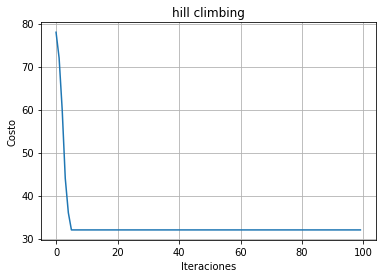

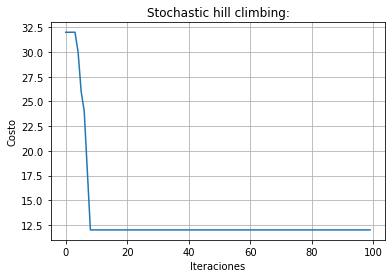

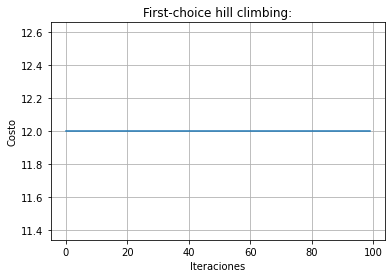

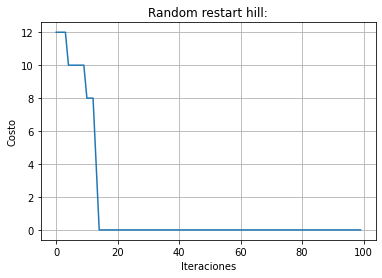

In [ ]:
import matplotlib.pyplot as plt
tablero = [
           [0,0,3,0,1,0],
           [5,6,0,3,2,0],
           [0,5,4,2,0,3],
           [2,0,6,4,5,0],
           [0,1,2,0,4,5],
           [0,4,0,1,0,0]
]
solucion=[1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]
s=sudoku(tablero)
e = estado(solucion)

variaciones={
    "hill climbing":hill_climbing,
    "Stochastic hill climbing:": Stochastic_hill_climbing,
    "First-choice hill climbing:": First_choice_hill_climbing,
    "Random restart hill:": Random_restart_hill
       }
iteraciones = 100
for nombre, funcion in variaciones.items():
  resultados = []
  for i in range(iteraciones):
    ite, v, e = funcion(s, e, i)
    resultados.append(v) 
  plt.plot(range(iteraciones), resultados)
  plt.title(nombre)
  plt.ylabel('Costo')
  plt.xlabel('Iteraciones')
  plt.grid(True)
  plt.show()
  

Evaluación algotimo genetico

Seleccionanado padres por torneo y variando la provavilidad de mutación con poblacion constante de 10

200


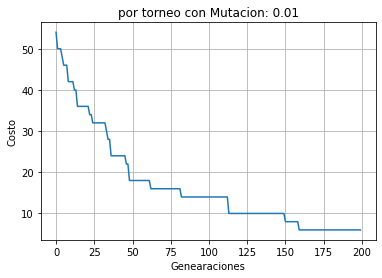

200


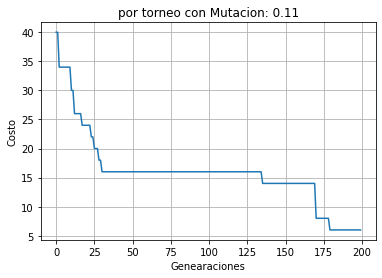

200


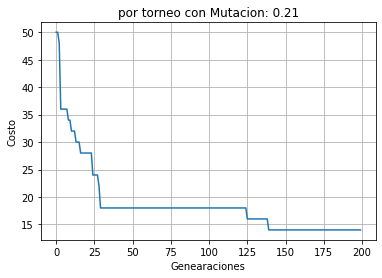

200


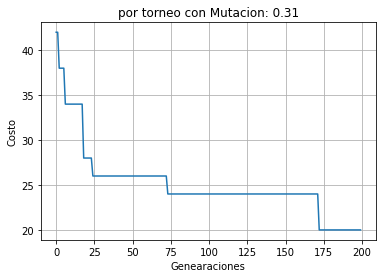

200


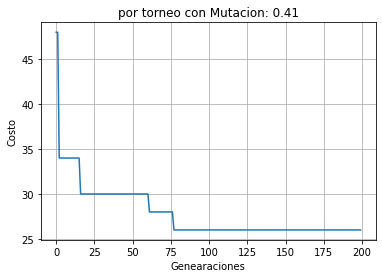

In [ ]:
algoritmo_genetico(Generaciones=100, poblacion=10, longitud_clomosoma=LONGITUD_CROMOSOMA, seleccion_padres=0, probabilidad_mutacion=0.1)
generaciones = 200
for i in range (1, 50, 10):
  historico, resultado = algoritmo_genetico(Generaciones=generaciones, poblacion=10, longitud_clomosoma=LONGITUD_CROMOSOMA, seleccion_padres=0, probabilidad_mutacion=i/100)
  plt.plot(range(generaciones), historico)
  plt.title('por torneo con Mutacion: {}'.format(i/100))
  plt.ylabel('Costo')
  plt.xlabel('Genearaciones')
  plt.grid(True)
  plt.show()
  

Seleccionanado padres por ruleta y variando la provavilidad de mutación  con poblacion constante de 10

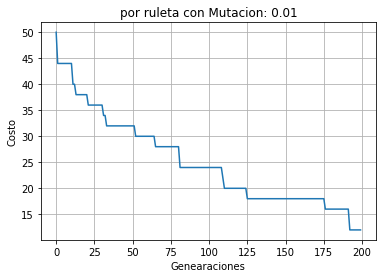

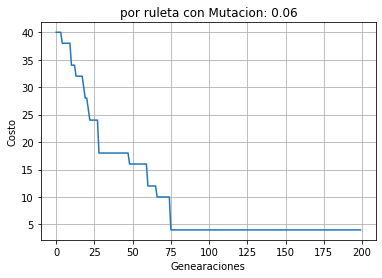

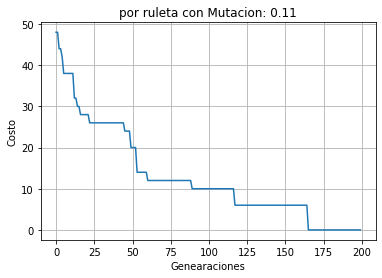

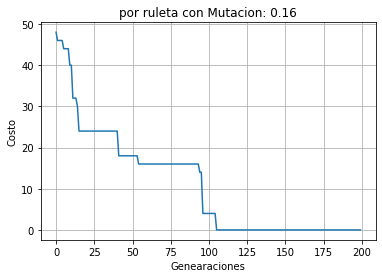

In [ ]:
algoritmo_genetico(Generaciones=100, poblacion=10, longitud_clomosoma=LONGITUD_CROMOSOMA, seleccion_padres=0, probabilidad_mutacion=0.1)
generaciones = 200
for i in range (1, 20, 5):
  historico ,resultado = algoritmo_genetico(Generaciones=generaciones, poblacion=10, longitud_clomosoma=LONGITUD_CROMOSOMA, seleccion_padres=1, probabilidad_mutacion=i/100)
  plt.plot(range(generaciones), historico)
  plt.title('por ruleta con Mutacion: {}'.format(i/100))
  plt.ylabel('Costo')
  plt.xlabel('Genearaciones')
  plt.grid(True)
  plt.show()